In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv('titanic_train.csv')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.shape

(891, 12)

In [9]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

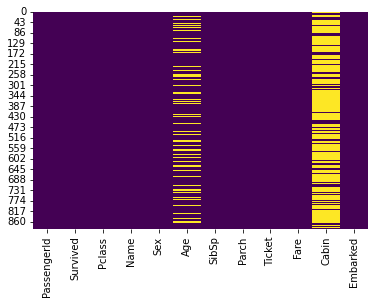

In [14]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [ ]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

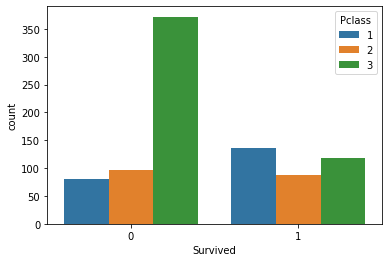

In [18]:
sns.countplot(x='Survived',hue='Pclass',data=data)

<AxesSubplot:xlabel='Age'>

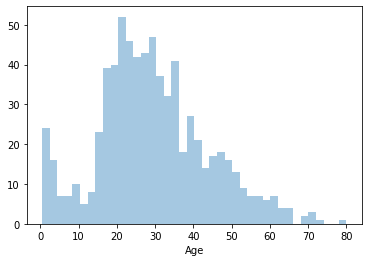

In [21]:
sns.distplot(data['Age'].dropna(),kde=False,bins=40)

<AxesSubplot:ylabel='Frequency'>

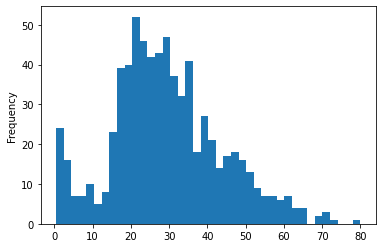

In [22]:
data['Age'].plot.hist(bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

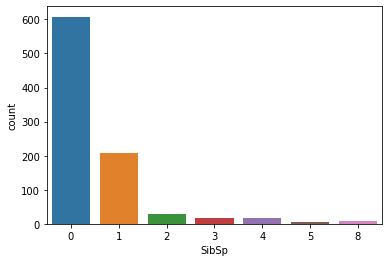

In [23]:
sns.countplot(x='SibSp',data=data)

<AxesSubplot:>

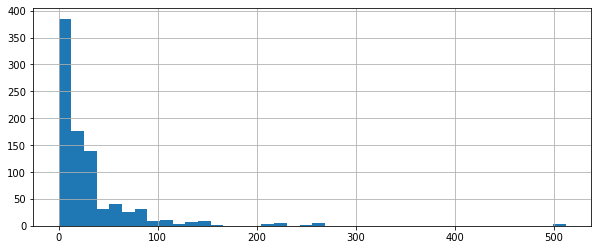

In [29]:
data['Fare'].hist(bins=40,figsize=(10,4))

<AxesSubplot:>

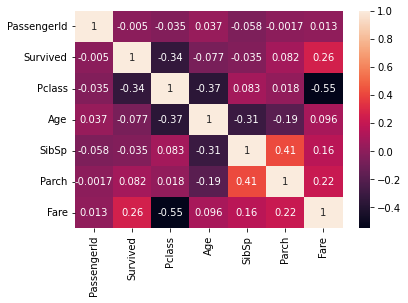

In [33]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

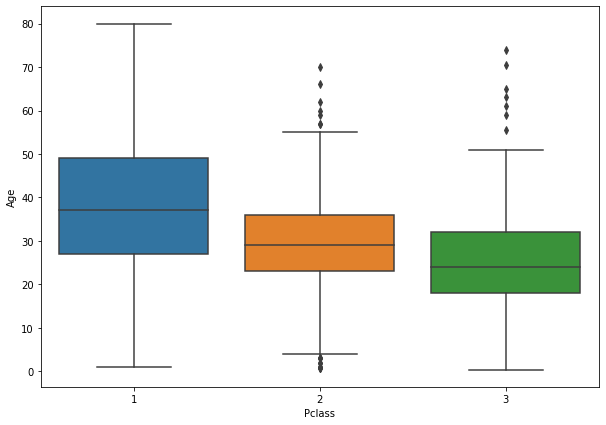

In [37]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=data)

In [61]:
def impute_age(cols):
    Age=cols[0]
    Pclass= cols[1]    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 23
    else:
        return Age

In [63]:
data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

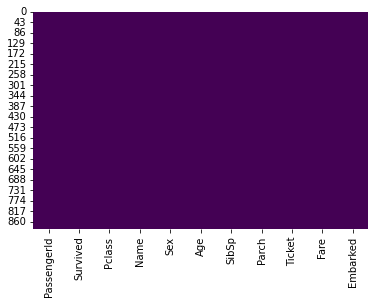

In [69]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [67]:
data.drop('Cabin',axis=1,inplace=True)

In [68]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,23,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,23,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,23,0,0,373450,8.0500,S


In [70]:
data.dropna(inplace=True)

In [82]:
Sex=pd.get_dummies(data['Sex'],drop_first=True)

In [76]:
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,23,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,23,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,23,0,0,373450,8.0500,S


In [78]:
embark=pd.get_dummies(data['Embarked'],drop_first=True)

In [83]:
data=pd.concat([data,Sex,embark],axis=1)

In [84]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,23,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,23,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,23,0,0,373450,8.0500,S,1,0,1


In [86]:
 data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [92]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,23,1,0,7.2500,1,0,1
1,1,1,37,1,0,71.2833,0,0,0
2,1,3,23,0,0,7.9250,0,0,1
3,1,1,37,1,0,53.1000,0,0,1
4,0,3,23,0,0,8.0500,1,0,1


In [91]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,27.611924,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,0.486260,0.834700,5.779265,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,0.000000,1.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,23.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,29.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,37.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [90]:
data.drop(['PassengerId'],axis=1,inplace=True)

In [93]:
X=data.drop('Survived',axis=1)

In [94]:
y=data['Survived']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
model=LogisticRegression()

In [101]:
model.fit(X_train,y_train)

D:\ml\new\ml\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
predictions=model.predict(X_test)

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       163
           1       0.84      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 36,  68]], dtype=int64)

In [122]:
X_test,y_test

(     Pclass  Age  SibSp  Parch    Fare  male  Q  S
 511       3   23      0      0    8.05     1  0  1
 613       3   23      0      0    7.75     1  1  0
 615       2   29      1      2   65.00     0  0  1
 337       1   37      0      0  134.50     0  0  0
 718       3   23      0      0   15.50     1  1  0
 ..      ...  ...    ...    ...     ...   ... .. ..
 792       3   23      8      2   69.55     0  0  1
 828       3   23      0      0    7.75     1  1  0
 732       2   29      0      0    0.00     1  0  1
 669       1   37      1      0   52.00     0  0  1
 634       3   23      3      2   27.90     0  0  1
 
 [267 rows x 8 columns],
 511    0
 613    0
 615    1
 337    1
 718    0
       ..
 792    0
 828    1
 732    0
 669    1
 634    0
 Name: Survived, Length: 267, dtype: int64)

In [116]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [124]:
df_columns=X.columns
df_data=[[
    '2','29','0','0','0.00','1','0','1'
]]
df=pd.DataFrame(df_data,columns=X.columns)

In [125]:
model.predict(df)

array([0], dtype=int64)